# Games 

The objective of this projecto is to analyze the sales of video game along the years to answer some questions, watch patterns, deterine which games genres are the best, etc, the full list of questions can be found here []().

The DataSet was downloaded from [here](https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv)

The columns are:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.style as style

In [2]:
game=pd.read_csv('game.csv')

In [3]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Ok we have a total of 16,598 entries, there are some columns with missing values, so lets check what we can do to solve that.
All the columns are neccesary for the analysis, so droping them is not on the table.

In [4]:
game.sort_values(by='Global_Sales',ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning the DataSet

Lets see first wich columns are the ones with less data than the total

In [6]:
columns=game.columns
c={}
for each in columns:
    x=game[each]
    y=int(x.notnull().sum())
    if y<16598:
        c[each]=16598-y
    
c

{'Year': 271, 'Publisher': 58}

The columns with missing values are Year an Publisher. Lets watch these columns in more detail.

In [7]:
game.Year.value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

We have games since 1980 until 2020, but we have two years missing, 2018 and 2019, that is an issue from the data extraction. The important thing here is that the unique values of years are a lot, so the missing values cannot be filled with the most frequent value. And how to investigate each game with the Year missing will be time consuming, so, the proper thing to do is to fill the null values with the value `Unknown`. And eh `Publisher` column too. Lets do this.

In [8]:
game['Year']=game['Year'].fillna('Unknown')
game['Publisher']=game['Publisher'].fillna('Unknown')

In [9]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


The amount of values and the types for every column looks to be good now.

Now, we cannot trust completly on what we have, we have to check everythin to enssure we are working with good data, so there is a column called `Global Sales` that is the sum of the sales of 4 regions, North America, Europe, Japan and Others, so lets check if the sum of these really is what the `Global Sales` tell us.

In [10]:
sales=game[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].sum(axis=1)
total_sales=game['Global_Sales'].astype('float')

In [11]:
equal=sales!=total_sales
equal.sum()

6775

There are 6775 games that the sum of their sales per region does not match the `Global_Sales` column. So lets replace total column with the column we just crated.

In [12]:
game['Total_Sales']=sales

And Check if everything is correct.

In [13]:
s=game[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].sum(axis=1)
t=game['Total_Sales']
e=s!=t
e.sum()

0

Last, lets drop the `Global_Sales column`

In [14]:
game=game.drop(labels=['Global_Sales'],axis=1)

In [15]:
game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.00
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Now lets check if there are no duplicates

In [16]:
v=game.duplicated().sum()
v

0

There are no duplicates.

In a previuos part of this project we changed the Nan values in the `Years` column to `UNknown` but this generate some troubles while traying to work with dates, so lets see if we can change the `Unknown` to an actual date.

What we will do is to take all the games with unknown as date and save it in a `z` variable.

Then we will take the names of those games and make them a list

Then we will loop for every name and match it in the main DataFrame, take every row that matches and save them in a `dt` list variable, so when the loop ends we can concatenate all of them and finish with a DataFrame with all the repetitive names.

In [17]:
#All the games with `unknown` as date
z=game[game['Year']=='Unknown']
#Transform the Series to a list
nombres=list(z['Name'])
#Take all the games with the same name as the ones with unknown as date
dt=[]
for n in nombres:
    mask=game['Name']==n
    df=game[mask]
    dt.append(df)
dt=pd.concat(dt)

In [18]:
c=dt['Year']=='Unknown'
print(c.sum())

395


Currently we have 395 games with no date, lets watch them to understand them better

In [19]:
dt.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
179,180,Madden NFL 2004,PS2,Unknown,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.24
1881,1883,Madden NFL 2004,XB,2003,Sports,Electronic Arts,1.02,0.02,0.00,0.05,1.09
3896,3898,Madden NFL 2004,GC,2003,Sports,Electronic Arts,0.40,0.10,0.00,0.01,0.51
5712,5714,Madden NFL 2004,GBA,2003,Sports,Electronic Arts,0.22,0.08,0.00,0.01,0.31
377,378,FIFA Soccer 2004,PS2,Unknown,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.50
2623,2625,FIFA Soccer 2004,XB,2003,Sports,Electronic Arts,0.24,0.49,0.00,0.05,0.78
11996,11998,FIFA Soccer 2004,GC,2003,Sports,Electronic Arts,0.05,0.01,0.00,0.00,0.06
13040,13042,FIFA Soccer 2004,GBA,2003,Sports,Electronic Arts,0.04,0.01,0.00,0.00,0.05
394,395,LEGO Batman: The Videogame,X360,2008,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0.00,0.32,3.38
431,432,LEGO Batman: The Videogame,Wii,Unknown,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17


From analyzing all these we can see that we have a variation of results.

- We have games that are multi platform, so all of them, that have the same name, were released the same year, and we can take the year from one of them to fill the one with the `Unknown` date.

- We have the same case as above, but in this case none of the games have date, looks like all Music games have this problem.

- There are games with no multi platform, so there are no date to compare.

- There are games with the same name, for differente platforms, but in different years, so maybe the game with date as `Unknown` is not from the same of those years. 

From this we have two options, delete all the rows with `Unkwown` as date or try to fill the games that we can, and then delete the rest.

To safe the most information we can, lets try the second one. And for the games with different years, lets take the older years to fill the `Unkown` dates.

In [20]:
#Repeat the same process as before

#Get All the games with `unknown` as date
z=game[game['Year']=='Unknown']

#Transform the Series to a list
nombres=list(z['Name'])

#Loop every game that has as date `Unknown`, and bring them together
dt=[]
for n in nombres:
    
    #Create a boolean mask to know if it is the current game inside the DataFrame
    mask=game['Name']==n
    
    #Take all the games with the same name 
    df=game[mask]
    
    #Create a copy of df
    df2=game[mask]
    
    #Leave just the games with real dates
    con_fechas=df2[df2['Year']!='Unknown']
    
    #Extract the maximun date
    maximo_fecha=con_fechas['Year'].max()
    
    #Create a boolean to know which row is the one with the date 'Unknown'
    booleano=df2['Year']=='Unknown'
    
    #Replace the `Unknown` date with the maximun date
    df2.loc[booleano,'Year']=maximo_fecha
    
    #Append it to the dt list
    dt.append(df2)
    
#Concatenate all together
dt=pd.concat(dt)

C:\Users\varel\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [21]:
dt.head(30)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
179,180,Madden NFL 2004,PS2,2003,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.24
1881,1883,Madden NFL 2004,XB,2003,Sports,Electronic Arts,1.02,0.02,0.00,0.05,1.09
3896,3898,Madden NFL 2004,GC,2003,Sports,Electronic Arts,0.40,0.10,0.00,0.01,0.51
5712,5714,Madden NFL 2004,GBA,2003,Sports,Electronic Arts,0.22,0.08,0.00,0.01,0.31
377,378,FIFA Soccer 2004,PS2,2003,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.50
2623,2625,FIFA Soccer 2004,XB,2003,Sports,Electronic Arts,0.24,0.49,0.00,0.05,0.78
11996,11998,FIFA Soccer 2004,GC,2003,Sports,Electronic Arts,0.05,0.01,0.00,0.00,0.06
13040,13042,FIFA Soccer 2004,GBA,2003,Sports,Electronic Arts,0.04,0.01,0.00,0.00,0.05
394,395,LEGO Batman: The Videogame,X360,2008,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0.00,0.32,3.38
431,432,LEGO Batman: The Videogame,Wii,2008,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17


In [22]:
#Replace the rows from the previous dataFrame where the date column had the 'Unkown' value with the rows we just cleared
prueba=game
indices=dt.index
prueba.loc[indices]=dt

In [23]:
#Lets check how many missing values we have now
prueba['Year'].isnull().sum()

147

We know have 147 rows without date, which is a reduction of 248 values.

These rows have no hope,then we can drop them.

In [24]:
index_labels=prueba[prueba['Year'].isnull()].index
index_labels
prueba=prueba.drop(index_labels)

In [25]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16451 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         16451 non-null  int64  
 1   Name         16451 non-null  object 
 2   Platform     16451 non-null  object 
 3   Year         16451 non-null  object 
 4   Genre        16451 non-null  object 
 5   Publisher    16451 non-null  object 
 6   NA_Sales     16451 non-null  float64
 7   EU_Sales     16451 non-null  float64
 8   JP_Sales     16451 non-null  float64
 9   Other_Sales  16451 non-null  float64
 10  Total_Sales  16451 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Due all the movements, the DataFrame name will be `prueba` since now.

## Analyzing the Games

### Which is the game that sold the most?

In [26]:
game_most_sold=game[game['Total_Sales']==game['Total_Sales'].max()]
game_most_sold

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


The game that has sold the most is the `Wii Sports` for the Wii console with 82.74 Millions Sales. North America is the region that has the half of the sales, ollowed by EU witt 29 million sales.

### Which games were the first ones

The videogames started in the 70s with the Odyssey, but was quickly surpassed by Atari. This dataframe starts from 1980, so the games from the 70's are not included.

In [27]:
prueba['Year'].min()

1980.0

In [28]:
early=prueba[prueba['Year']==1980].sort_values('Total_Sales',ascending=False)
early

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.0,0.01,0.50
5366,5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00,0.23


All the games belong to the Atari 2600in 1980.
We can see that activision is a company since the beginning of games.
In the earlt days, the game that sold the most `1980` was the `Asteroids` game with a totla of `4.31` million sales.

## Which games sold the most per year?

In [29]:
#Take the unique values of the year column
anos=list(prueba['Year'].unique())

columnas=prueba.columns #Take the columns from the DataFrame

best_anos=pd.DataFrame(columns=columnas) # Create an empty dataFrame with the opriginal columns

#Get the best games per year
for each in anos:
    datos=prueba[prueba['Year']==each] 
    juego=datos[datos['Total_Sales']==datos['Total_Sales'].max()] #Take only the max sales
    best_anos=best_anos.append(juego)

    

In [30]:
best_anos.sort_values('Year')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
239,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
89,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
421,422,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
127,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.50
251,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
22,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [31]:

#meter imagen

## Which are the most sold games per console?

In [32]:
#Take the unique values
consolas=prueba['Platform'].unique()

pd.set_option('display.max_rows', 500) #To watch all the rows

plataformas=pd.DataFrame(columns=columnas)

for each in consolas:
    data=prueba[prueba['Platform']==each]
    data=data.sort_values('Total_Sales',ascending=False)
    data=data.iloc[:10]
    plataformas=plataformas.append(data)
plataformas


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
39,40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
48,49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27


In [33]:
print(prueba['Platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


## Which genre sell the most

In [34]:
genres=prueba['Genre'].unique()

In [35]:
d={}
for each in genres:
    datos=prueba[prueba['Genre']==each]
    datos_1=datos.groupby('Year').sum()['Total_Sales']
    d[each]=datos_1

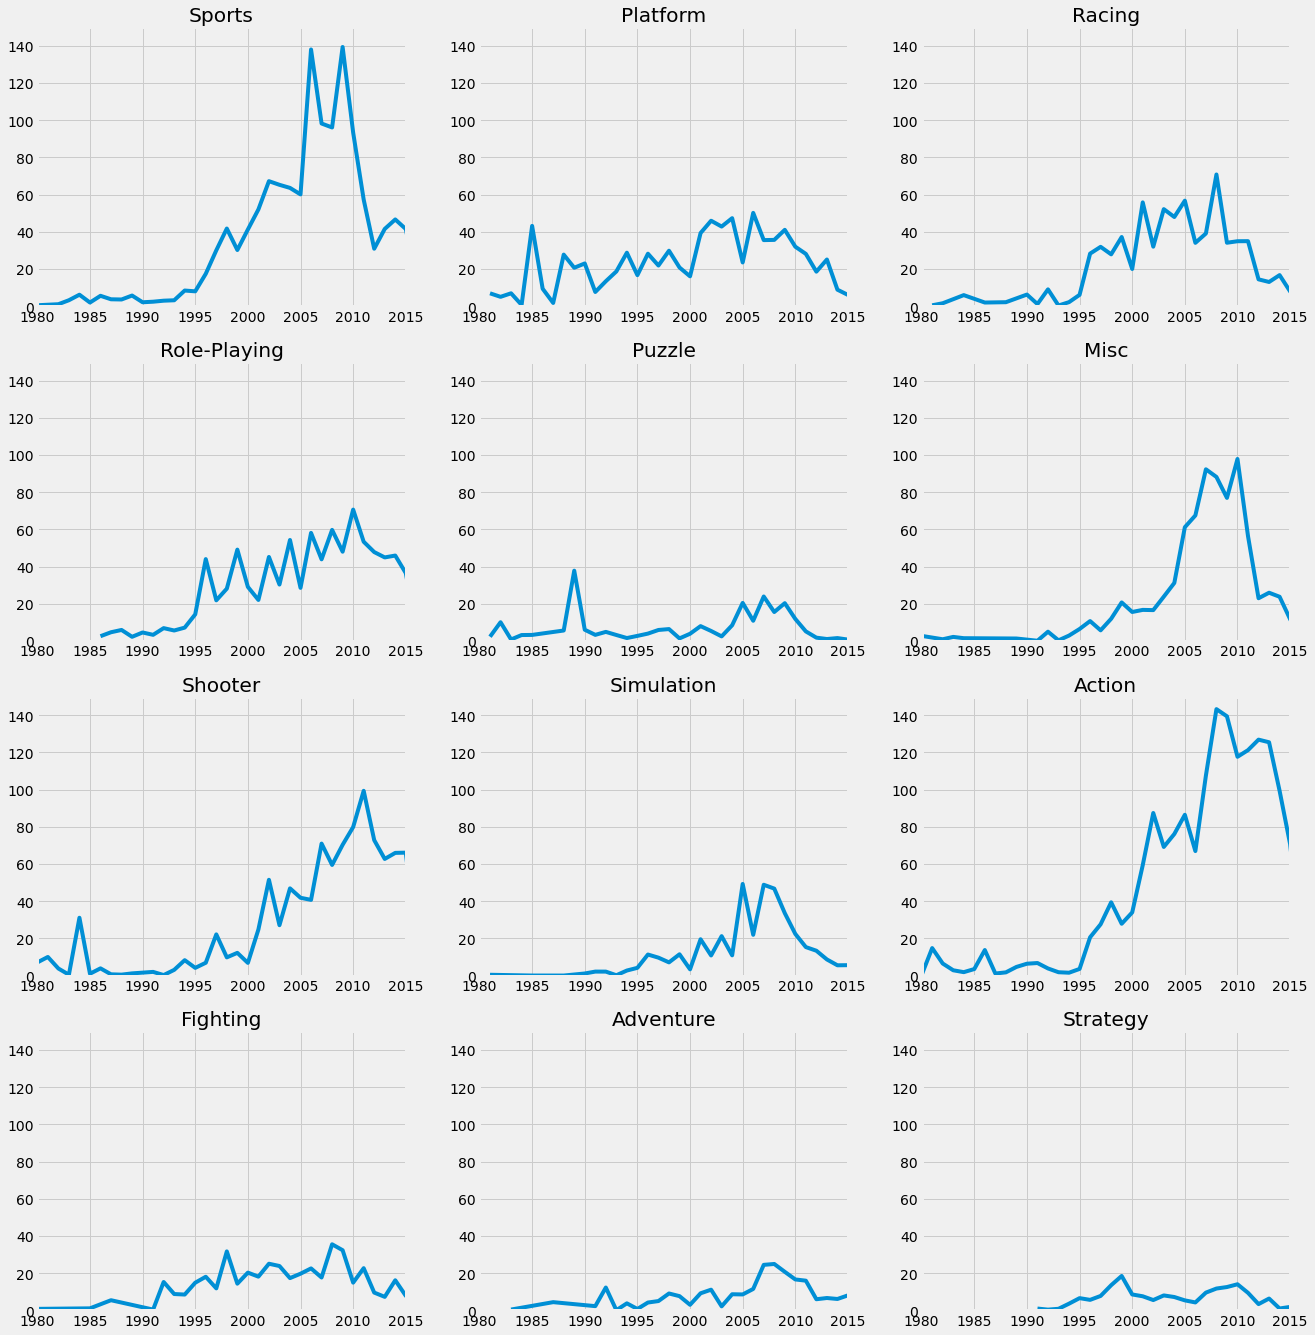

In [36]:
style.use('fivethirtyeight')
plt.figure(figsize=(20,22))
for i,genre in zip(range(1,13),d):
    data=d[genre]
    plt.subplot(4,3,i)
    plt.plot(data)
    plt.title(genre)
    plt.ylim([0,150])
    plt.xlim([1980,2015])
plt.show()

#borrar todos los datos despues del 2016, checar cuantos hay del 2016 que sirvan, si no eliminarlos

Viendo esto, algunos generos presentan leve aumento de venta a traves de los anos, lo que se podria explicar con la gran variedad de nuevos juegos y cnsolas saliendo a partit dfe la decada de los 90, pero no desarrollo no es tal que se consideren tendencia o materi importante en la indsutria de los videojuegos.

Sin ebargo hay algunos generos que valen la pena checar:
- Sports
- Role PLaying
- Shooter
- Action

Tengo puras graficas, pero me gustaria saber valores de cuanto es el total que han vendido

Checar a fondo los generos de arriba

## Which genres create each animation house

In [37]:
publi=prueba['Publisher'].unique()
publi

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

There are a lot of animation houses. Lets check if all of them are relevant.

In [38]:
datta={}
for each in publi:
    datos=prueba[prueba['Publisher']==each]
    filas=datos.shape[0]
    datta[each]=filas

In [39]:
dat=pd.DataFrame.from_dict(datta,orient='index') #Create aData Frame from the dict to better understanding
dat.value_counts() #Check if there are enough games for every animation house
dat

,0
Nintendo,697
Microsoft Game Studios,189
Take-Two Interactive,413
Sony Computer Entertainment,682
Activision,972
...,...
Inti Creates,1
Takuyo,1
Interchannel-Holon,1
Rain Games,1


In [40]:
dat.value_counts()

1       192
2        66
3        54
4        30
6        23
5        22
8        16
7        12
10        9
14        9
9         9
13        8
16        8
12        6
15        6
17        6
18        5
23        4
22        4
19        4
27        4
11        3
37        3
45        3
32        3
36        2
35        2
61        2
30        2
71        2
20        2
26        2
25        2
90        2
104       2
232       2
39        2
29        1
33        1
34        1
24        1
21        1
40        1
1348      1
43        1
972       1
192       1
196       1
197       1
217       1
338       1
349       1
378       1
413       1
636       1
682       1
697       1
712       1
825       1
920       1
930       1
189       1
186       1
184       1
67        1
51        1
52        1
56        1
57        1
60        1
62        1
73        1
183       1
81        1
85        1
122       1
128       1
152       1
161       1
50        1
dtype: int64

Tere are good amount of animation houses that have made less than 10 games, maybe because they are new in this field, or they have already dissapeared, 10 games are a small amount of games and there is no poin to compare those animation houses vs the big ones, so les drop every animation house that has made less than 10 games.

In [41]:
dat_2=dat[dat[0]<=10] # Get all the animation houses with lees than 10 games
dat_20=dat_2.index #Get their name

# Get a DataFrame where inly those animation houses are
publishers=pd.DataFrame()
for each in dat_20:
    row_1=prueba[prueba['Publisher']==each]
    publishers=publishers.append(row_1)
    
    
indices=publishers.index #Get their index number in the main DataFrame
houses=prueba.drop(indices) # Drop the animation houses from the main DF and store it in  houses

## Which animation houses should change their genre games creation.

### 1.1Get how many games per genre each Publisher published

In [42]:
pu={}
publishers=houses['Publisher'].unique() #Take the publishers


for p in publishers:
    dic={}
    publi_data=houses[houses['Publisher']==p] #Take all the games from every publisher
    publi_data=publi_data.groupby('Genre').count() # Gropu by genre
    rows=publi_data.shape[0] #Get how many genres the animation house has
    generos=publi_data.index #Get the genre names
    #Get the number of games each genre has for every animation house
    for i,g in zip(range(len(generos)),generos): 
        genre=g
        row=publi_data.iloc[i] # Get every Row in the grouped DataFrame
        amount=row['Publisher']
        dic[genre]=amount
    pu[p]=dic
pu

{'Nintendo': {'Action': 78,
  'Adventure': 35,
  'Fighting': 18,
  'Misc': 100,
  'Platform': 111,
  'Puzzle': 74,
  'Racing': 37,
  'Role-Playing': 106,
  'Shooter': 24,
  'Simulation': 28,
  'Sports': 55,
  'Strategy': 31},
 'Microsoft Game Studios': {'Action': 21,
  'Adventure': 3,
  'Fighting': 5,
  'Misc': 34,
  'Platform': 6,
  'Puzzle': 1,
  'Racing': 22,
  'Role-Playing': 16,
  'Shooter': 28,
  'Simulation': 18,
  'Sports': 17,
  'Strategy': 18},
 'Take-Two Interactive': {'Action': 93,
  'Adventure': 12,
  'Fighting': 1,
  'Misc': 27,
  'Platform': 11,
  'Puzzle': 1,
  'Racing': 20,
  'Role-Playing': 6,
  'Shooter': 65,
  'Simulation': 4,
  'Sports': 151,
  'Strategy': 22},
 'Sony Computer Entertainment': {'Action': 90,
  'Adventure': 41,
  'Fighting': 30,
  'Misc': 128,
  'Platform': 66,
  'Puzzle': 12,
  'Racing': 65,
  'Role-Playing': 49,
  'Shooter': 51,
  'Simulation': 15,
  'Sports': 123,
  'Strategy': 12},
 'Activision': {'Action': 309,
  'Adventure': 25,
  'Fighting': 7

### 1.2 Get the genre that published more per Publisher

In [43]:
#Get the genre that was released the most
pu_max={}
for k,v in pu.items():
    dic_2={}
    maximo=max(v,key=v.get) #Get the key with the maximun game sells
    llave=v[maximo] #Get the amount of games sells
    dic_2[maximo]=llave #Save in a dic the kay and value for the animation house
    pu_max[k]=dic_2
pu_max

{'Nintendo': {'Platform': 111},
 'Microsoft Game Studios': {'Misc': 34},
 'Take-Two Interactive': {'Sports': 151},
 'Sony Computer Entertainment': {'Misc': 128},
 'Activision': {'Action': 309},
 'Ubisoft': {'Action': 193},
 'Bethesda Softworks': {'Shooter': 21},
 'Electronic Arts': {'Sports': 561},
 'Sega': {'Sports': 134},
 'SquareSoft': {'Role-Playing': 38},
 'Atari': {'Sports': 55},
 '505 Games': {'Simulation': 41},
 'Capcom': {'Action': 154},
 'GT Interactive': {'Shooter': 12},
 'Konami Digital Entertainment': {'Sports': 280},
 'Sony Computer Entertainment Europe': {'Misc': 4},
 'Square Enix': {'Role-Playing': 128},
 'LucasArts': {'Action': 48},
 'Virgin Interactive': {'Fighting': 19},
 'Warner Bros. Interactive Entertainment': {'Action': 165},
 'Universal Interactive': {'Action': 9},
 'Eidos Interactive': {'Action': 83},
 'Vivendi Games': {'Action': 44},
 'Enix Corporation': {'Role-Playing': 23},
 'Namco Bandai Games': {'Action': 248},
 'Hasbro Interactive': {'Misc': 8},
 'THQ': {

Lets now get the amount of money each genre for each animation house has made

### 2.1 Get how much money each genre made per publisher

In [44]:
sales={}
publishers=houses['Publisher'].unique() #Take the publishers


for p in publishers:
    d={}
    publi_data=houses[houses['Publisher']==p] #Take all the games from every publisher
    publi_data=publi_data.groupby('Genre').sum() # Gropu by genre
    rows=publi_data.shape[0] #Get how many genres the animation house has
    generos=publi_data.index # Get the genre names
    #Get the number of games each genre has for every animation house
    for i,g in zip(range(len(generos)),generos): 
        genre=g
        row=publi_data.iloc[i] # Get every Row in the grouped DataFrame
        amount=round(row['Total_Sales'],3)
        d[genre]=amount
    sales[p]=d
sales


{'Nintendo': {'Action': 128.15,
  'Adventure': 35.67,
  'Fighting': 53.33,
  'Misc': 180.63,
  'Platform': 426.15,
  'Puzzle': 124.78,
  'Racing': 151.33,
  'Role-Playing': 284.86,
  'Shooter': 69.66,
  'Simulation': 85.26,
  'Sports': 218.0,
  'Strategy': 26.74},
 'Microsoft Game Studios': {'Action': 12.44,
  'Adventure': 1.61,
  'Fighting': 2.46,
  'Misc': 47.01,
  'Platform': 1.65,
  'Puzzle': 0.09,
  'Racing': 33.11,
  'Role-Playing': 20.57,
  'Shooter': 95.44,
  'Simulation': 12.47,
  'Sports': 14.63,
  'Strategy': 4.3},
 'Take-Two Interactive': {'Action': 211.11,
  'Adventure': 7.56,
  'Fighting': 0.06,
  'Misc': 10.61,
  'Platform': 3.39,
  'Puzzle': 0.07,
  'Racing': 21.25,
  'Role-Playing': 6.07,
  'Shooter': 54.58,
  'Simulation': 0.9,
  'Sports': 76.71,
  'Strategy': 7.39},
 'Sony Computer Entertainment': {'Action': 94.47,
  'Adventure': 13.54,
  'Fighting': 28.15,
  'Misc': 80.78,
  'Platform': 103.98,
  'Puzzle': 3.73,
  'Racing': 110.56,
  'Role-Playing': 44.03,
  'Shoote

### 2.2 Get the Genre that made more money per Publisher

In [45]:
#Get the genre that sold the most
sales_max={}
for k,v in sales.items():
    dic_2={}
    maximo=max(v,key=v.get) #Get the key with the maximun game sells
    llave=v[maximo] #Get the amount of games sells
    dic_2[maximo]=llave #Save in a dic the kay and value for the animation house
    sales_max[k]=dic_2
sales_max

{'Nintendo': {'Platform': 426.15},
 'Microsoft Game Studios': {'Shooter': 95.44},
 'Take-Two Interactive': {'Action': 211.11},
 'Sony Computer Entertainment': {'Racing': 110.56},
 'Activision': {'Shooter': 299.78},
 'Ubisoft': {'Action': 142.96},
 'Bethesda Softworks': {'Role-Playing': 54.15},
 'Electronic Arts': {'Sports': 479.52},
 'Sega': {'Sports': 71.67},
 'SquareSoft': {'Role-Playing': 52.61},
 'Atari': {'Fighting': 25.92},
 '505 Games': {'Simulation': 22.18},
 'Capcom': {'Action': 85.11},
 'GT Interactive': {'Action': 8.87},
 'Konami Digital Entertainment': {'Sports': 98.95},
 'Sony Computer Entertainment Europe': {'Misc': 6.61},
 'Square Enix': {'Role-Playing': 97.02},
 'LucasArts': {'Action': 61.99},
 'Virgin Interactive': {'Action': 20.35},
 'Warner Bros. Interactive Entertainment': {'Action': 118.23},
 'Universal Interactive': {'Platform': 11.97},
 'Eidos Interactive': {'Action': 64.6},
 'Vivendi Games': {'Platform': 17.09},
 'Enix Corporation': {'Role-Playing': 32.4},
 'Nam

### 3 Compare if the genres that sold more games are the games that each animation house create more.

In [46]:
# Get from sales_max
sales_1=[] #Get the genres that sold more
plataforma_sales=[]
cuantos_dinero_vendido=[]
for k,v in sales_max.items():
    pl=k
    genero=v
    for llave,cantidad in genero.items():
        genre=llave
        cant=cantidad
    sales_1.append(genre)  
    plataforma_sales.append(pl)
    cuantos_dinero_vendido.append(cant)
#Get from pu_max
publisher_2=[] #Get the genres that have more games
plataforma_pu=[]
cuantos_juegos_publicados=[]

for k,v in pu_max.items():
    pl_pu=k
    genero=v
    for llave,valor in genero.items():
        genre=llave
        cantidad=valor
    publisher_2.append(genre)
    cuantos_juegos_publicados.append(cantidad)
    plataforma_pu.append(pl_pu)

In [47]:
#A boolean where says if the genre that sold the most is equal to the genre that has more games
sale_1_series=pd.Series(sales_1)
publisher_1_series=pd.Series(publisher_2)
sales_vs_publisher=sale_1_series==publisher_1_series
sales_vs_publisher
# Filtrar el dataframe de abajo para que nada mas esten las casas de estudio con False

0       True
1      False
2      False
3      False
4      False
5       True
6      False
7       True
8       True
9       True
10     False
11      True
12      True
13     False
14      True
15      True
16      True
17      True
18     False
19      True
20     False
21      True
22     False
23      True
24     False
25      True
26      True
27      True
28      True
29      True
30     False
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39     False
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48     False
49      True
50      True
51     False
52      True
53      True
54      True
55     False
56      True
57     False
58     False
59      True
60      True
61      True
62      True
63      True
64     False
65      True
66      True
67      True
68      True
69     False
70     False
71     False
72     False
73      True
74      True
75      True
76      True

In [48]:
# Get the amount of money the genre with more releases earn
money_publisher=[]
for casa,genero in zip(publishers,publisher_2):
    informacion=houses[houses['Publisher']==casa]
    informacion=informacion[informacion['Genre']==genero]
    total=informacion['Total_Sales'].sum()
    money_publisher.append(total)
money=pd.Series(money_publisher)

#Get the amount of games the genre with most sales have
total_juegos=[]
for casa,genero in zip(publishers,sales_1):
    informacion=houses[houses['Publisher']==casa]
    informacion=informacion[informacion['Genre']==genero]
    total=informacion['Genre'].count()
    total_juegos.append(total)
juegos=pd.Series(total_juegos)


In [49]:
# sales_1 Series
sale_1_series
# publisher_2 Series 
publisher_1_series
# plataforma_sales Sereis
plt_ser=pd.Series(plataforma_sales)
# plataforma_pu Sereis
plt_pu=pd.Series(plataforma_pu)

# Combine all the Series to see a complete DataFrame
sales_vs_releases=pd.DataFrame()
sales_vs_releases['Platform']=plt_ser
sales_vs_releases['More_Releases']=publisher_1_series
sales_vs_releases['How_Many_Games']=cuantos_juegos_publicados
sales_vs_releases['How_Much_Sold']=money
sales_vs_releases['More Sells']=sale_1_series
sales_vs_releases['Hoe Many Games']=juegos
sales_vs_releases['How Much Sold']=cuantos_dinero_vendido

sales_vs_releases

,Platform,More_Releases,How_Many_Games,How_Much_Sold,More Sells,Hoe Many Games,How Much Sold
0,Nintendo,Platform,111,426.15,Platform,111,426.15
1,Microsoft Game Studios,Misc,34,47.01,Shooter,28,95.44
2,Take-Two Interactive,Sports,151,76.71,Action,93,211.11
3,Sony Computer Entertainment,Misc,128,80.78,Racing,65,110.56
4,Activision,Action,309,142.01,Shooter,159,299.78
5,Ubisoft,Action,193,142.96,Action,193,142.96
6,Bethesda Softworks,Shooter,21,13.61,Role-Playing,17,54.15
7,Electronic Arts,Sports,561,479.52,Sports,561,479.52
8,Sega,Sports,134,71.67,Sports,134,71.67
9,SquareSoft,Role-Playing,38,52.61,Role-Playing,38,52.61


Now lets take all the Animation Houses that their genre with more releases are the genre with most sales

In [50]:
good_desicions=sales_vs_releases.loc[sales_vs_publisher,:]
good_desicions

,Platform,More_Releases,How_Many_Games,How_Much_Sold,More Sells,Hoe Many Games,How Much Sold
0,Nintendo,Platform,111,426.15,Platform,111,426.15
5,Ubisoft,Action,193,142.96,Action,193,142.96
7,Electronic Arts,Sports,561,479.52,Sports,561,479.52
8,Sega,Sports,134,71.67,Sports,134,71.67
9,SquareSoft,Role-Playing,38,52.61,Role-Playing,38,52.61
11,505 Games,Simulation,41,22.18,Simulation,41,22.18
12,Capcom,Action,154,85.11,Action,154,85.11
14,Konami Digital Entertainment,Sports,280,98.95,Sports,280,98.95
15,Sony Computer Entertainment Europe,Misc,4,6.61,Misc,4,6.61
16,Square Enix,Role-Playing,128,97.02,Role-Playing,128,97.02


Now lets know the houses that the genre with more releases are note the genres with more sells

In [51]:
bool_2=~sales_vs_publisher
bad_desicions=sales_vs_releases.loc[bool_2,:]
bad_desicions['Diference']=round(bad_desicions['How Much Sold']-bad_desicions['How_Much_Sold'],3)
bad_desicions.sort_values('Diference',ascending=False)

<ipython-input-51-03fb3be0dc4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_desicions['Diference']=round(bad_desicions['How Much Sold']-bad_desicions['How_Much_Sold'],3)


,Platform,More_Releases,How_Many_Games,How_Much_Sold,More Sells,Hoe Many Games,How Much Sold,Diference
4,Activision,Action,309,142.01,Shooter,159,299.78,157.77
2,Take-Two Interactive,Sports,151,76.71,Action,93,211.11,134.40
1,Microsoft Game Studios,Misc,34,47.01,Shooter,28,95.44,48.43
6,Bethesda Softworks,Shooter,21,13.61,Role-Playing,17,54.15,40.54
3,Sony Computer Entertainment,Misc,128,80.78,Racing,65,110.56,29.78
24,Namco Bandai Games,Action,248,36.81,Fighting,134,61.26,24.45
10,Atari,Sports,55,12.42,Fighting,37,25.92,13.50
18,Virgin Interactive,Fighting,19,7.98,Action,12,20.35,12.37
20,Universal Interactive,Action,9,3.69,Platform,7,11.97,8.28
13,GT Interactive,Shooter,12,3.17,Action,10,8.87,5.70


Thesed houses maybe need some strategy changes, but it still be too soon to say that, we need to see how the sells developed through thew years and see if there is a change of tandency on the games people want. But as we can see here right now, all these animation houses need to think more what knid of game they need to be doing.

## The top game for each animation house



In [52]:
best_game=pd.DataFrame()
for house in publishers:
    games=houses[houses['Publisher']==house]
    best=[games[games['Total_Sales']==games['Total_Sales'].max()]]
    best_game=best_game.append(best)
best_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.97
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
75,76,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
85,86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.05
87,88,Final Fantasy VIII,PS,1999,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86


The best games for the 2 biggest houses that are `Nintendo` and `Microsoft Game Studios` are games that they made from what in that moment was a new way to play, using your body instead of your hands, that is `Wii Sports` and `Kinect Adventures`.

## Whats the top game for every genre


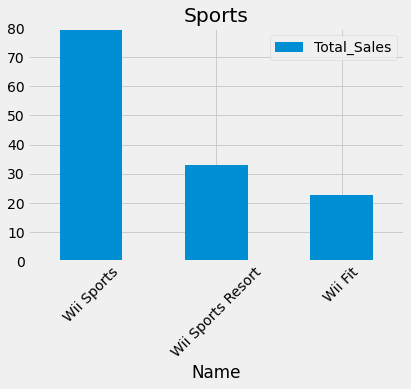

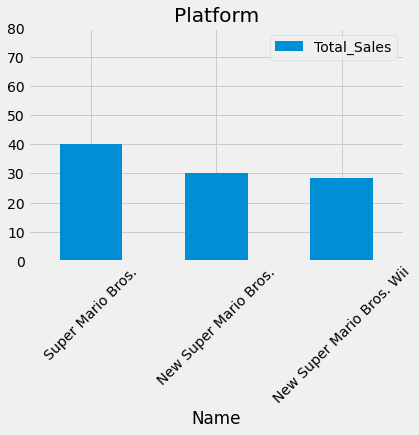

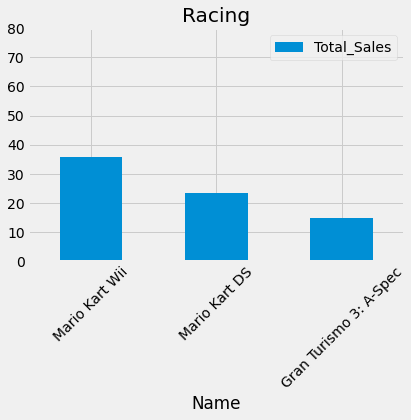

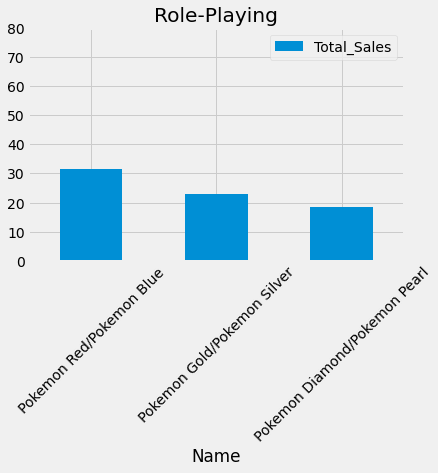

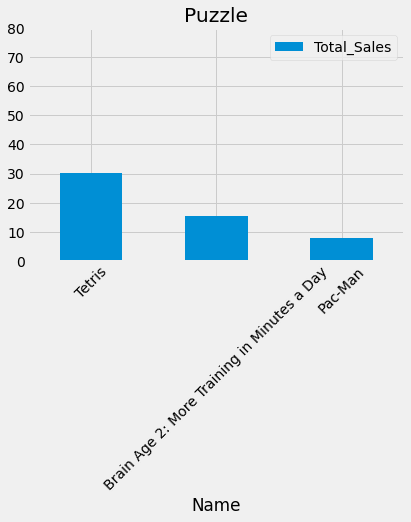

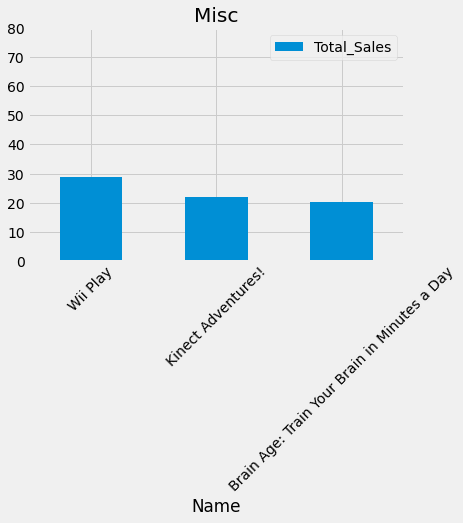

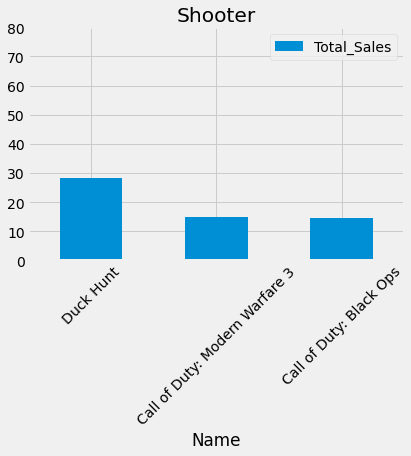

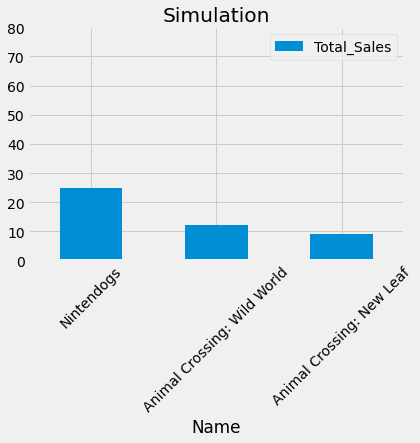

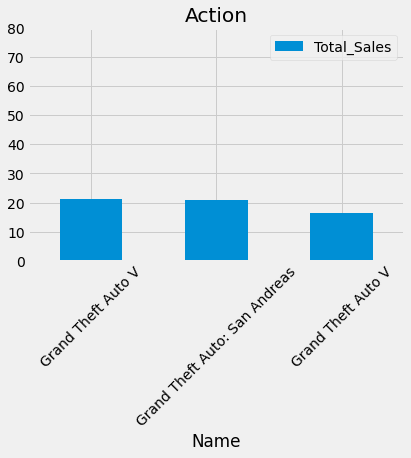

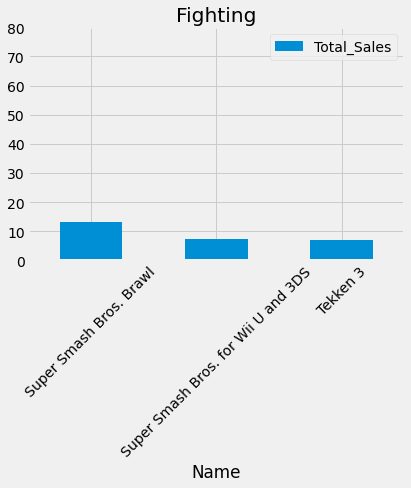

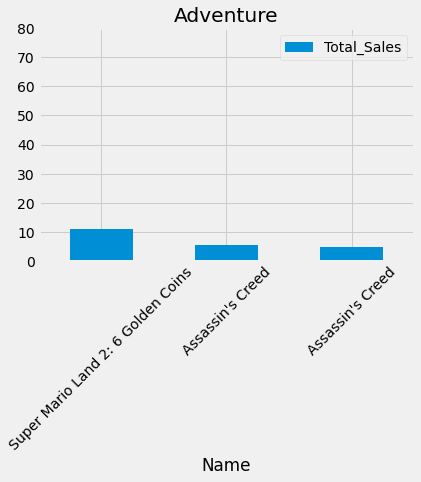

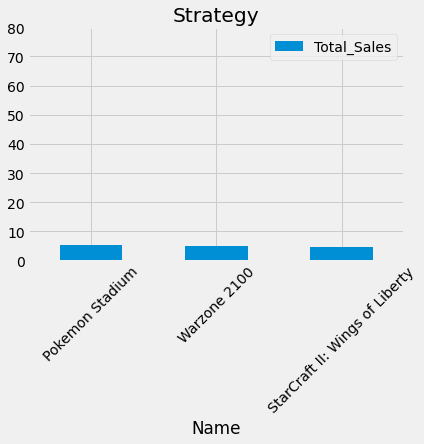

In [53]:
best_games_per_genre=pd.DataFrame()
for i,g in zip(range(1,13),genres):
    g_d=prueba[prueba['Genre']==g]
    g_d.sort_values('Total_Sales',ascending=False)
    g_d=g_d.head(3)
    g_d=g_d[['Name','Total_Sales']]
    best_games_per_genre=best_games_per_genre.append(g_d)
    g_d.set_index('Name',inplace=True)
    g_d.plot.bar()
    plt.title(g)
    plt.xticks(rotation=45)
    plt.ylim([0,80])
plt.show()

## Which animation house is the most powerful



<AxesSubplot:>

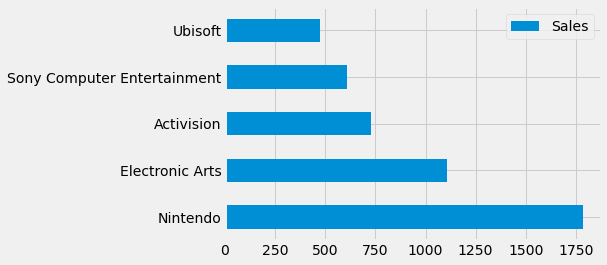

In [54]:
powerful={}

for p in publishers:
    p_p=prueba[prueba['Publisher']==p] #DataFrame with only games of one publisher
    money=p_p['Total_Sales'].sum() #Get the total Sales
    powerful[p]=money #Poblate the dictionary
    
# power_house=max(powerful,key=powerful.get)
# print('The most powerful house is {} with {} million sold'.format(power_house,powerful[power_house]))

power_df=pd.DataFrame.from_dict(powerful,orient='index',columns=['Sales']) # Convert the dictionarty to a Data Frame
power_df.sort_values('Sales',ascending=False,inplace=True)
bar=power_df.head()
bar.plot.barh()

Thse are the Animation houses that have sold more in their intire exisence. Nintendo Surpasses all of them by an incredible number of 1750 millions, followed by Electronic Arts, Activision, Sony and Ubisoft.

So we can say that these animation houses know how to do good games that sell.

Letsd dive more in houw these houses have developed throug the years.

In [55]:
# Hacer una porpbilidad esa de distribucion para estas 5 marcas

## What kinf of game consumes each country

Pingo el pais y el genero que mas se ha vendido en ese pais o region

In [56]:
print(len(prueba['Genre'].unique()))

12


## What platform company has sold more games


In [57]:
prueba['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [58]:
consolas={'Nintendo':['Wii','NES','GB','DS','SNES','GBA','3DS','N64','WiiU','GC'],'Microsoft':['X360','XB','XOne'],'Sony':['PS3', 'PS2','PS4','PS','PSP','PSV'],'Other':['2600','GEN','DC','SAT','SCD','WS','NG','TG16','3DO', 'GG']}


In [59]:
columna=prueba['Platform']
columna_2=columna.replace(['Wii','NES','GB','DS','SNES','GBA','3DS','N64','WiiU','GC'],'Nintendo')
columna_2=columna_2.replace(['X360','XB','XOne'],'Microsoft')
columna_2=columna_2.replace(['PS3', 'PS2','PS4','PS','PSP','PSV'],'Sony')
columna_2=columna_2.replace(['2600','GEN','DC','SAT','SCD','WS','NG','TG16','3DO', 'GG','PCFX'],'Other')

In [60]:
company=prueba.copy()
company['Company']=columna_2

<BarContainer object of 5 artists>

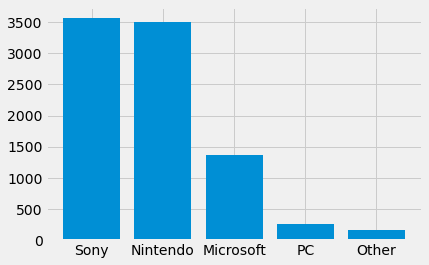

In [61]:
company_sales=company.groupby('Company').sum()
company_sales.sort_values('Total_Sales',inplace=True,ascending=False)
company_sales
plt.bar(company_sales.index,company_sales['Total_Sales'])

Talking about games by themselves, SONY has the top 1 by surpassing for almost nothing to Nintendo, making these 2 copmanies the biggest in the games world. 

These makes sense taking in account the age of every company. Nintendo is the only company that stills alive being part of the firsts generations of viodeogames, so they have so much more sales than other companies. 

And Sony was a breakground with their first two consoles. 

This is true till 2016, because this dataset only contain data until that date.

## On what games Japan surpasses on sales to other countries?

In [62]:
all_sales=company[['NA_Sales','EU_Sales','Other_Sales']].sum(axis=1)
japan_sales=company[company['JP_Sales']>all_sales]
japan_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
149,150,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.85,Nintendo
161,162,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.51,Sony
173,174,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2.78,0.14,5.31,Sony
180,181,Dragon Quest VIII: Journey of the Cursed King,PS2,2004,Role-Playing,Square Enix,0.65,0.75,3.61,0.20,5.21,Sony
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,Sony
...,...,...,...,...,...,...,...,...,...,...,...,...
16575,16578,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,Sony
16580,16583,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01,Sony
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01,Nintendo
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01,Sony


There are 3,759 games ehare Japan surpassed all the other countries in games. Lets dive more into them

In [63]:
japan_sales[japan_sales['Company']=='Microsoft']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
9539,9541,Monster Hunter Frontier Online,X360,2010,Role-Playing,Capcom,0.00,0.00,0.13,0.0,0.13,Microsoft
10110,10112,Murakumo: Renegade Mech Pursuit,XB,2002,Shooter,From Software,0.04,0.01,0.06,0.0,0.11,Microsoft
11437,11439,Steins;Gate: Hiyoku Renri no Darling,X360,2011,Adventure,5pb,0.00,0.00,0.08,0.0,0.08,Microsoft
11643,11645,The Idolm@ster,X360,2007,Simulation,Namco Bandai Games,0.00,0.00,0.08,0.0,0.08,Microsoft
11796,11798,The Idolm@ster: Live for You!,X360,2008,Misc,Namco Bandai Games,0.00,0.00,0.07,0.0,0.07,Microsoft
12004,12006,Ultimate Marvel vs. Capcom 3,X360,2011,Fighting,Capcom,0.00,0.03,0.04,0.0,0.07,Microsoft
12226,12228,Dream C Club,X360,2009,Simulation,D3Publisher,0.00,0.00,0.07,0.0,0.07,Microsoft
12414,12416,Steins;Gate,X360,2009,Adventure,5pb,0.00,0.00,0.06,0.0,0.06,Microsoft
12975,12977,The Idolmaster 2,X360,2011,Simulation,Namco Bandai Games,0.00,0.00,0.05,0.0,0.05,Microsoft
13330,13332,Shin Megami Tensei NINE,XB,2002,Role-Playing,Atlus,0.00,0.00,0.05,0.0,0.05,Microsoft


Japan is known to consume locally, so it strange that they have games from a foregn company that were most sold in that country, but if we look closely we can see that all the games are about themes of their culture. We can sustan this for 2 things, the first are the games names, and second, the majority of the games only have sells in Japan, not in other country, so or they were sxlusive release or other people in the world were not very intereted and the sells were too low to show up.

In [64]:
japan_sales['Genre'].value_counts()

Role-Playing    677
Adventure       664
Action          613
Misc            430
Sports          374
Fighting        275
Strategy        220
Simulation      176
Shooter          96
Puzzle           91
Platform         80
Racing           63
Name: Genre, dtype: int64

Japan is also known for loving `Role-Playing` games, and we can see that that genre is the one with more games, sollowed by `Adventure` and `Action`, so following the logic above, these games are about japanese themes followed by `Role-Playing` `Adventure` or `Action` games.

## What games, for each genre, have broke the market

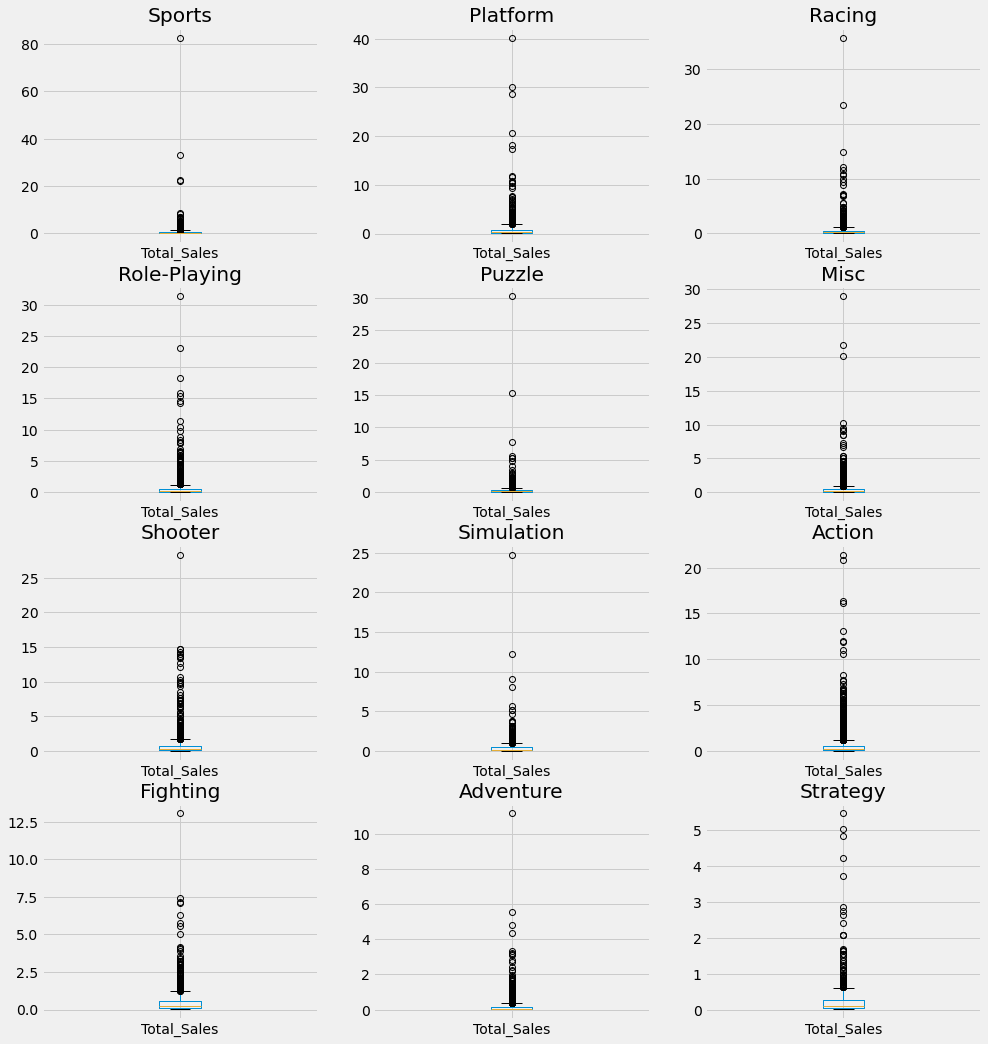

In [65]:
generos=company['Genre'].unique()
plt.figure(figsize=(15,17))
for i,genre in zip(range(1,13),generos):
    datos=company[company['Genre']==genre]['Total_Sales']
    plt.subplot(4,3,i)
    datos.plot.box()
    plt.title(genre)
plt.show()
    

In some genres we can see more or less where the outliers start, but for others is really hard to see, lets start with the outliers que can actualy see. Not all the outliers will be added, only those top 10 or top 5 for every genre.

- Strategy: Bigger than 1M.
- Adventure: Bigger than 3M.
- Fighting: Bigger than 5M.
- Action:  Bigger than 10M.
- Simulation: Bigger than 5M.
- Shooter: Bigger than 10M.
- Misc: Bigger than 5M.
- Puzzle: Bigger than 5M.
- Role-Playing: Bigger than 10M.
- Racing: Bigger than 10M.
- Platform: Bigger than 10M.
- Sports: Bigger than 10M.

Lets see those games.

In [66]:
s=[10,10,10,10,5,5,10,5,10,5,3,1]
juego=pd.DataFrame()
for g,sales in zip(generos,s):
    d=company[company['Genre']==g]
    d_2=d[d['Total_Sales']>=sales]
    d_2=d_2.head()
    juego=juego.append(d_2)
juego

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,Nintendo
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,Nintendo
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62,Nintendo
21,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Nintendo


Explicar lo de arriba

In [67]:
company_sales['Company']=company_sales.index
power_df['Name']=power_df.index


In [68]:
#d.to_csv(r'C:\Users\varel\OneDrive\Documentos\Data Science\Power Bi\try.csv',index=False)
# Game that sold the most
game_most_sold.to_csv(r'C:\Users\varel\OneDrive\Documentos\Data Science\Power Bi\game_most_sold.csv',index=False)
#WhicH animation house is the most powerfukk
power_df.to_csv(r'C:\Users\varel\OneDrive\Documentos\Data Science\Power Bi\power_df.csv',index=False)
#Company that has made more money in the games

company_sales.to_csv(r'C:\Users\varel\OneDrive\Documentos\Data Science\Power Bi\company_sales.csv',index=False)
#Diferencia entre ventas de mas vendidos y mas juegos




(1994.0, 2015.0)

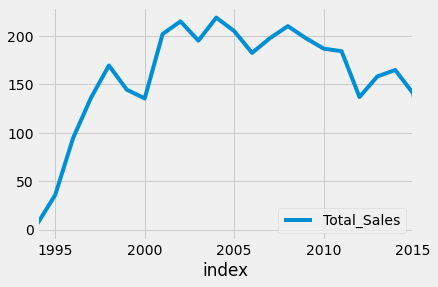

In [69]:
sony_sales=company[company['Company']=='Sony']
sony_sales=sony_sales.groupby('Year').sum()
sony_sales['index']=sony_sales.index
sony_sales.plot(x='index',y='Total_Sales')
plt.xlim(1994,2015)

In [70]:
companias=company['Company'].unique()
compa=pd.DataFrame()
for com in companias:
    com_sales=company[company['Company']==com]
    com_sales=com_sales.groupby('Year').sum()
    com_sales['index']=com_sales.index
    filas=com_sales.shape[0]
    com_sales['Company']=com
    compa=compa.append(com_sales)
#     plt.plot(x=com_sales['index'],y=com_sales['Total_Sales'])
compa
    

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,index,Company
Year,,,,,,,,
1983.0,7404,2.32,0.46,8.10,0.08,10.96,1983.0,Nintendo
1984.0,16613,33.02,2.09,14.27,0.70,50.08,1984.0,Nintendo
1985.0,36828,33.31,4.68,14.56,0.91,53.46,1985.0,Nintendo
1986.0,24944,11.87,2.80,19.81,1.93,36.41,1986.0,Nintendo
1987.0,12936,6.62,1.32,11.63,0.19,19.76,1987.0,Nintendo
1988.0,11788,23.18,6.53,15.76,0.97,46.44,1988.0,Nintendo
1989.0,27248,44.56,8.41,18.36,1.49,72.82,1989.0,Nintendo
1990.0,24517,23.60,7.08,14.77,1.32,46.77,1990.0,Nintendo
1991.0,212566,9.73,3.04,14.52,0.61,27.90,1991.0,Nintendo


In [71]:
compa.to_csv(r'C:\Users\varel\OneDrive\Documentos\Data Science\Power Bi\compa.csv',index=False)

In [72]:
ppp=prueba.copy()
ppp.sort_values('Total_Sales',ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
